#### CS164 Preclass Work for Session 5.1

### Unconstrained Optimization Algorithms: Newton's Method & Conjugate Gradient Method
_Yoav Rabinovich, Feb 20_

---------------------------

**(1)** _Modify your gradient descent code from the last class to take a Newton step instead of the descent step. Compare the performance to gradient descent on a Rosenbrock function: $10(y − x^2)^2 + (x − 1)^2$, starting from initial guess $(-0.8,1)$. Investigate the effect of adding a backtracking line search._

In [0]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Optimization functions
def gradient_descent_solver(f, grad_f, x_0, step_cap, epsilon, \
                            line_search_step_cap, line_search_epsilon, \
                            newton_step = None, uniform_alpha = None):
    
    x = x_0
    steps = [x]

    for k in range(0,step_cap):
        # Check for completion
        grad = grad_f(x)
        if np.abs(np.sum(grad)) <= epsilon:
            break
        # Determine descent direction
        if newton_step:
            d = -newton_step(x)
        else:
            d = -grad #/np.linalg.norm(grad)
        # Determine step size
        if uniform_alpha:
            alpha = uniform_alpha
        else:
            alpha = exact_line_search(grad_f,x,d,line_search_step_cap,line_search_epsilon)
        # Update
        x = x+alpha*d
        steps.append(x)

    return steps

def exact_line_search(grad_f,x,d,line_search_step_cap,line_search_epsilon):

    h_prime = lambda a : np.dot(grad_f(x+a*d).T,d)

    # Initial guess
    alpha_l = 0
    alpha_u = 1
    for s in range(0,line_search_step_cap):
        if h_prime(alpha_u) <= 0:
            alpha_u = 2*alpha_u

    # Bisection
    for s in range(0,line_search_step_cap):
        # Test alpha_hat
        alpha_t = (alpha_u+alpha_l)/2
        test = h_prime(alpha_t)
        # Check for completion
        if np.abs(test) <= line_search_epsilon:
            break
        # Update
        elif test > 0:
            alpha_u = alpha_t
        elif test < 0:
            alpha_l = alpha_t

    return alpha_t

In [0]:
# # Example function

# Q = np.array([[20,5],[5,2]])
# q = np.array ([[14],[6]])
# c = 10

# def f(x):
#     return 0.5*np.dot(np.dot(x.T,Q),x)-np.dot(q.T,x)+c

# def grad_f(x):
#     return np.dot(Q,x)+q

# def hess_f(x):
#     return Q

# def newton_step(x):
#     return np.matmul(np.linalg.inv(hess_f(x)),grad_f(x))

In [0]:
# Rosenbrock function

f = lambda x: 10*(x[1] - x[0]**2)**2 + (x[0] - 1)**2
grad_f = lambda x: np.array([2*(x[0]-1) + 200*(x[1] - x[0]**2)*(-2*x[0]), 200*(x[1]-x[0]**2)], dtype='float')
hess_f = lambda x: np.array([[1200*x[0]**2-400*x[1]+2, -400*x[0]], [-400*x[0], 200]], dtype='float')

def newton_step(x):
    return np.matmul(np.linalg.inv(hess_f(x)),grad_f(x))


In [0]:
# Optimization
x_0 = np.array([[-0.8],[1]])
step_cap = 1000
epsilon = 1e-6
line_search_step_cap = 1000
line_search_epsilon = 1e-6

steps = gradient_descent_solver(f,grad_f,x_0,step_cap,epsilon,\
                                line_search_step_cap,line_search_epsilon,\
                                newton_step,1)

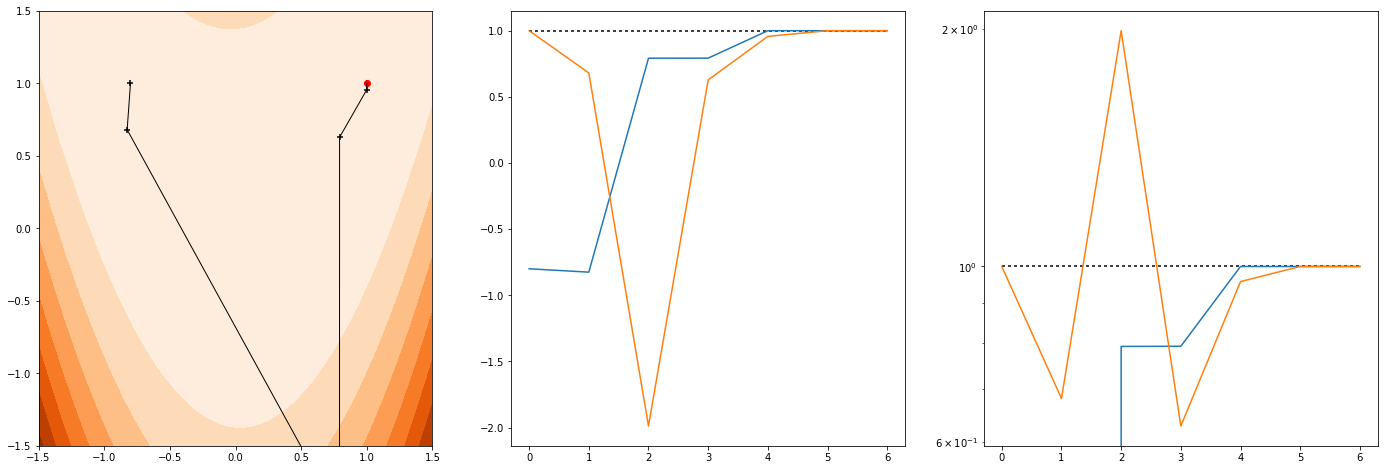

In [73]:
# Plotting
x_cap = 1.5
x_floor = -1.5
y_cap = 1.5
y_floor = -1.5
resolution = 100

fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax1.axis([x_floor, x_cap, y_floor, y_cap])
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Level sets
X, Y = np.meshgrid(np.linspace(x_floor,x_cap,resolution), \
                   np.linspace(y_floor,y_cap,resolution))
Z = np.empty(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f(np.array([X[i,j],Y[i,j]]))
# Z = np.array(Z).reshape(X.shape)
ax1.contourf(X,Y,Z,cmap="Oranges")

# Descent
steps_x,steps_y = zip(*steps)
ax1.scatter(steps_x,steps_y,c="black",marker="+",linewidths=2)
ax1.plot(steps_x,steps_y,c="black",linewidth=1)
ax1.scatter(1,1,color="red",marker="o")

# Convergence
x_range = range(len(steps_x))

ax2.plot(x_range,np.full(len(steps_x),1),dashes=[2,2],c="black")
ax2.plot(x_range,steps_x)
ax2.plot(x_range,steps_y)

ax3.plot(x_range,np.full(len(steps_x),1),dashes=[2,2],c="black")
ax3.semilogy(x_range,steps_x)
ax3.semilogy(x_range,np.abs(steps_y))

plt.show()

**(2)** _Trace through the conjugate gradient method for the function example in the video, from initial state $(-4,1)$ and compute the directions $d_j$ until the minimum is found._

In [0]:
def conjugate_gradient_method(f, grad_f, x_0, step_cap = 100, epsilon = 1e-6):

    x = x_0
    steps = [x]
    d = -grad_f(x)
    d_k = np.dot(d.T, d)    
    for i in range(step_cap):
        if d_k < epsilon:
            return steps
        alpha = d_k / np.dot(d.T, np.dot(Q, d))
        x = x + alpha*d
        g = -grad_f(x)
        beta = np.dot(d.T,np.dot(Q,-g))/np.dot(d.T,np.dot(Q,d))
        d = g+beta*d
        d_k = np.dot(d.T, d)
        steps.append(x)
    return steps

In [0]:
Q = np.array([[2/3,1/5],[1/5,2/3]])
q = np.array([[0],[0]])
c = np.array([[0],[0]])

def f(x):
    return 0.5*np.dot(np.dot(x.T,Q),x)+np.dot(q.T,x)+c

def grad_f(x):
    return np.dot(Q,x)+q

x_0 = np.array([[-4.],[1.]])

steps = conjugate_gradient_method(f, grad_f, x_0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


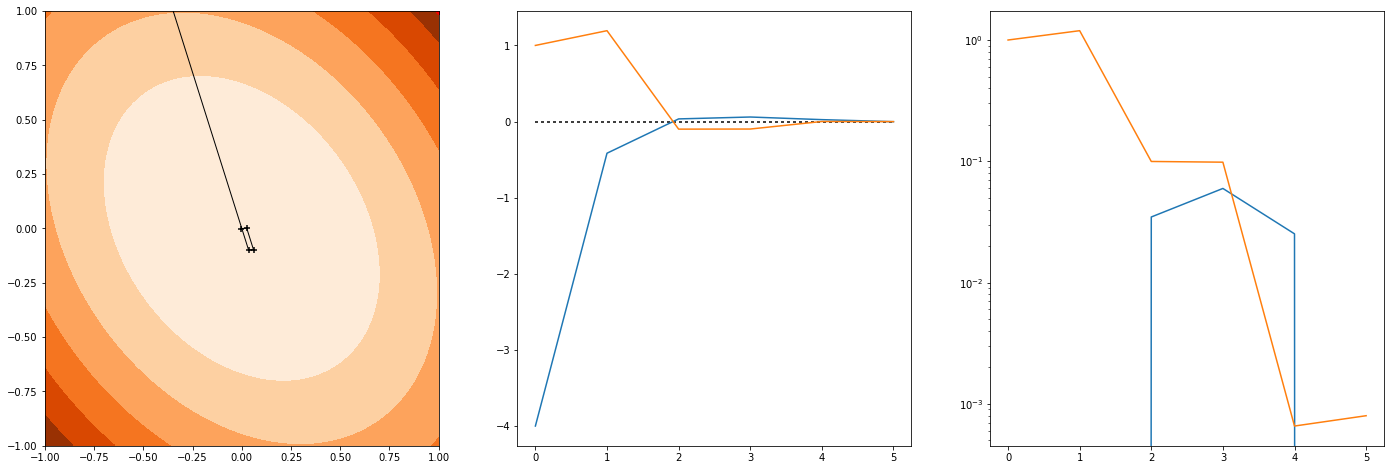

In [68]:
# Plotting
x_cap = 1
x_floor = -1
y_cap = 1
y_floor = -1
resolution = 100

fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax1.axis([x_floor, x_cap, y_floor, y_cap])
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Level sets
X, Y = np.meshgrid(np.linspace(x_floor,x_cap,resolution), \
                   np.linspace(y_floor,y_cap,resolution))
Z = np.empty(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f(np.array([[X[i,j],Y[i,j]]]).T)[0]
# Z = np.array(Z).reshape(X.shape)
ax1.contourf(X,Y,Z,cmap="Oranges")

# Descent
steps_x,steps_y = zip(*steps)
ax1.scatter(steps_x,steps_y,c="black",marker="+",linewidths=2)
ax1.plot(steps_x,steps_y,c="black",linewidth=1)
ax1.scatter(1,1,color="red",marker="o")

# Convergence
x_range = range(len(steps_x))

ax2.plot(x_range,np.full(len(steps_x),0),dashes=[2,2],c="black")
ax2.plot(x_range,steps_x)
ax2.plot(x_range,steps_y)

ax3.plot(x_range,np.full(len(steps_x),0),dashes=[2,2],c="black")
ax3.semilogy(x_range,steps_x)
ax3.semilogy(x_range,np.abs(steps_y))

plt.show()